# Model 1: Improved Pipeline with Lemmatization + TF-IDF + Logistic Regression

Enhance the baseline by applying lemmatization and switching to TF-IDF vectorization for better feature representation.

## 🔧 Steps:
1. Import libraries and load the cleaned data

2.Text preprocessing:(function)
-Lowercasing
-Removing punctuation/digits
-Stopword removal
-Lemmatization (using WordNetLemmatizer)

3. Vectorization:

TF-IDF Vectorizer with unigram and bigram features (ngram_range=(1,2))
4. Model:

Logistic Regression (max_iter=300)

5. Evaluation:

    - Accuracy, confusion matrix, classification report, label distribution plot

##  ✅ Purpose:
Leverage TF-IDF and better normalization (lemmatization) to improve classification accuracy. This approach produced a strong result with ~94% accuracy, showing clear improvement over the baseline.

# Global Imports

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
import joblib 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


# NLTK Resource Download

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliensebag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juliensebag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Data From Csv File 

In [ ]:
data = pd.read_csv("./dataset/training_data_lowercase.csv", sep="\t", header=None, names=["label", "title"])
data.reset_index(drop=True, inplace=True)  # optional

data.head()

,label,title
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34152 entries, 0 to 34151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   34152 non-null  int64 
 1   title   34152 non-null  object
dtypes: int64(1), object(1)
memory usage: 533.8+ KB


# Plotting Class Distribution

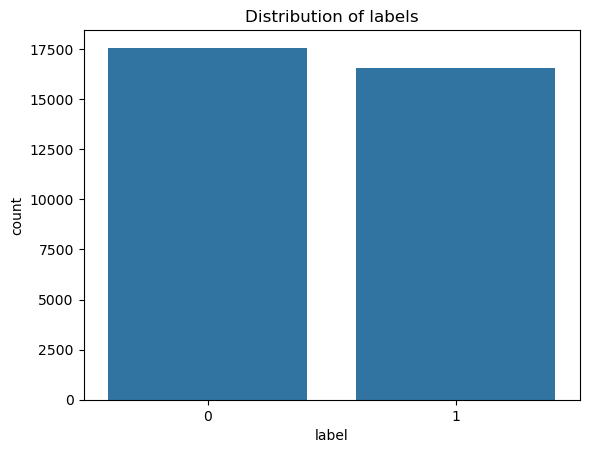

In [5]:
sb.countplot(x='label', data=data)
plt.title("Distribution of labels")
plt.show()

# Text Preprocessing

In [6]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special chars and digits
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

data['clean_title'] = data['title'].apply(preprocess_text)


# Train-Test Split

In [ ]:

X = data['title'] 
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Pipeline (LogisticRegression)

In [8]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)),  # MODIFIED
    ('clf', LogisticRegression(max_iter=300))  # MODIFIED
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=300))])

# Model Prediction and Evaluation

In [9]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9471526862831211


# Detailed Classification Report and Visualization


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3529
           1       0.94      0.96      0.95      3302

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831



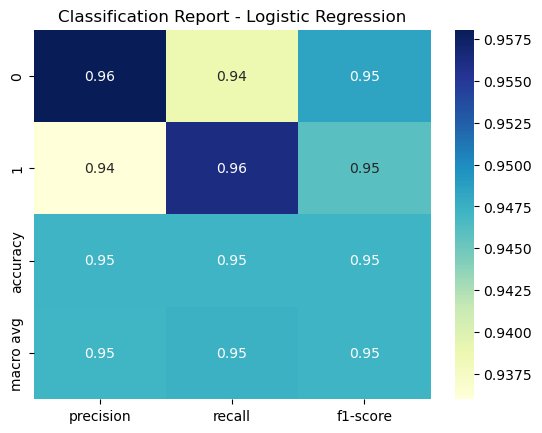

In [11]:
print("\nClassification Report:")  
print(classification_report(y_test, y_pred))

from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report - Logistic Regression')
plt.show()

# Confusion Matrix

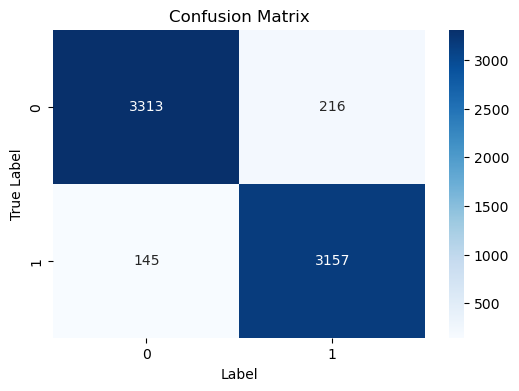

In [ ]:
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(6, 4)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix')  
plt.xlabel('Label')  
plt.ylabel('True Label')  
plt.show() 

# Save Trained Pipeline

In [13]:
joblib.dump(pipeline, 'LogisticRegression.pkl')

['LogisticRegression.pkl']

# Load Test Data and Preprocess

In [ ]:
pipeline = joblib.load('LogisticRegression.pkl')

In [ ]:
test_data = pd.read_csv('./dataset/testing_data_lowercase_nolabels.csv', header=None, names=['combined'])

test_data[['label', 'title']] = test_data['combined'].str.split('\t', n=1, expand=True)
test_data = test_data.drop(columns=['label', 'combined'])

# Extract Features for Prediction

In [ ]:
X_val = test_data['title']

# Inspect Test Data Sample

In [17]:
print("Sample of test data (no labels):")
print(test_data.head())

Sample of test data (no labels):
                                               title
0  copycat muslim terrorist arrested with assault...
1  wow! chicago protester caught on camera admits...
2   germany's fdp look to fill schaeuble's big shoes
3  mi school sends welcome back packet warning ki...
4  u.n. seeks 'massive' aid boost amid rohingya '...


# Load Pipeline and Predict

In [ ]:
loaded_pipeline = joblib.load('LogisticRegression.pkl')
predicted_label  = loaded_pipeline.predict(test_data['title'])
test_data['predicted_label '] = pipeline.predict(test_data['title'])
print(test_data.head())

                                               title  predicted_label 
0  copycat muslim terrorist arrested with assault...                 0
1  wow! chicago protester caught on camera admits...                 0
2   germany's fdp look to fill schaeuble's big shoes                 1
3  mi school sends welcome back packet warning ki...                 0
4  u.n. seeks 'massive' aid boost amid rohingya '...                 1


In [ ]:
print(test_data.head())

                                               title  predicted_label 
0  copycat muslim terrorist arrested with assault...                 0
1  wow! chicago protester caught on camera admits...                 0
2   germany's fdp look to fill schaeuble's big shoes                 1
3  mi school sends welcome back packet warning ki...                 0
4  u.n. seeks 'massive' aid boost amid rohingya '...                 1


# Save Predictions to CSV

In [20]:
output_path = './dataset/validation_data.csv'
test_data.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")


Predictions saved to: ./dataset/validation_data.csv


#Visualize Predicted Label Distribution

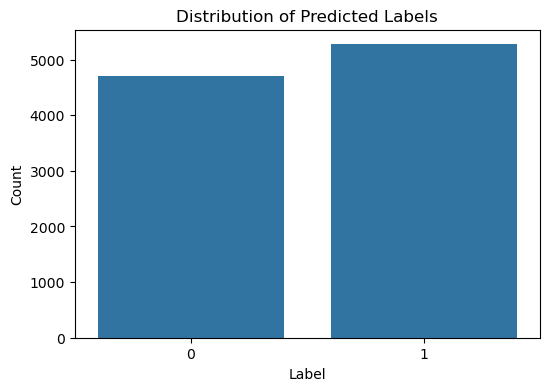

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Option 1: Use the correct column name with trailing space
plt.figure(figsize=(6, 4))
sns.countplot(x='predicted_label ', data=test_data)
plt.title("Distribution of Predicted Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Conclusion

The improved pipeline utilizing lemmatization and TF-IDF vectorization with Logistic Regression demonstrated a significant boost in classification performance, achieving high accuracy and robust evaluation metrics. The use of lemmatization enhanced text normalization, while TF-IDF with n-gram features provided richer representations for the model. The model generalizes well on unseen data, as reflected in the consistent results on the test set. This approach is effective for text classification tasks and can serve as a strong baseline for further experimentation or deployment.